# Dataframes

A __data frame__ is a way to store data in "rectangular" grids
* Each row corresponds to measurements or values of an instance, 
* Each column is a vector containing data for a specific variable. 
* Data frame’s rows do not need to contain, but can contain, the same type of values: they can be numeric, character, boolean, etc.

DataFrames in the Pandas library are defined as a __two-dimensional labeled data structures__ with columns of potentially different types.
       
Pandas' DataFrame consists of three main components: the data, the index, and the columns.
       
The DataFrame can contain data that is:
* a Pandas DataFrame
* a Pandas Series: a one-dimensional labeled array capable of holding any data type with axis labels or index. An example of a Series object is one column from a DataFrame.
* a NumPy ndarray, which can be a record or structured
* a two-dimensional ndarray
* dictionaries of one-dimensional ndarray’s, lists, dictionaries or Series.

![images/01_table_dataframe.svg](images/01_table_dataframe.svg)

Let's start by importing the libraries we will need for this notebook and set inline plotting

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

The basic Dataframe is an empty one as follows

In [2]:
df = pd.DataFrame()
df

""


## Make a dataframe
So, many things can serve as input to make a `DataFrame` (`DataFrame` is also the method!)
### From a numpy array (`nparray`)

In [3]:
data = np.array([[1,2],
                [3,4]])
data

array([[1, 2],
       [3, 4]])

In [4]:
type(data)

numpy.ndarray

In [5]:
pd.DataFrame(data=data)

,0,1
0,1,2
1,3,4


We can **define an index and name the columns**

In [6]:
pd.DataFrame(data=data,
             index=['row 1', 'row 2'],
             columns=['col 1', 'col 2']
             )

,col 1,col 2
row 1,1,2
row 2,3,4


We can also use a structured array as follows

In [7]:
pets = np.array(
    [
        ('Olivia', 1, 13.0),
        ('Violeta Maria', 3, 5.0)    
    ],
    dtype=[('name', 'U10'),   # 10-character string
           ('age', 'i4'),     # 4-byte signed integer
           ('weight', 'f4')]  # 4-byte floating-point number
)
pets

array([('Olivia', 1, 13.), ('Violeta Ma', 3,  5.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [8]:
data = pd.DataFrame(pets)
data

,name,age,weight
0,Olivia,1,13.0
1,Violeta Ma,3,5.0


### From Pandas' Series

A Pandas Series is an one-dimensional labeled array capable of holding any data type with axis labels or index. 

An example of a Series object is one column from a DataFrame.

In [9]:
name = pd.Series(['Margaret', 'John', 'Claudia', 'Mary', 'Peter', 'Helga', 'Heidi', 'Mary'])
age = pd.Series([17, 13, 44, 55, 71, 7, 16, 70])
gender = pd.Series(['F', 'M', 'F', 'F', 'M', 'F', 'F', 'F'])
classification = pd.Series([4, 3, 2, 5, 1, 7, 6, 7])

For example, the name Series is as follows

In [10]:
name

0    Margaret
1        John
2     Claudia
3        Mary
4       Peter
5       Helga
6       Heidi
7        Mary
dtype: object

And the building of the data frame

In [11]:
persons_df = pd.DataFrame(data=[name, age, gender, classification],
                          columns=range(8),
                          index=['name', 'age', 'gender', 'classification']
                         )

persons_df

,0,1,2,3,4,5,6,7
name,Margaret,John,Claudia,Mary,Peter,Helga,Heidi,Mary
age,17,13,44,55,71,7,16,70
gender,F,M,F,F,M,F,F,F
classification,4,3,2,5,1,7,6,7


If we prefer, data can be transposed

In [12]:
persons_df.transpose()

,name,age,gender,classification
0,Margaret,17,F,4
1,John,13,M,3
2,Claudia,44,F,2
3,Mary,55,F,5
4,Peter,71,M,1
5,Helga,7,F,7
6,Heidi,16,F,6
7,Mary,70,F,7


Unless explicitly done, most of the operation are **NOT done inline**. So, we must store the returned data

In [13]:
persons_df = persons_df.T # equivalent to persons_df.transpose()
persons_df

,name,age,gender,classification
0,Margaret,17,F,4
1,John,13,M,3
2,Claudia,44,F,2
3,Mary,55,F,5
4,Peter,71,M,1
5,Helga,7,F,7
6,Heidi,16,F,6
7,Mary,70,F,7


### From a Python's Dictionary

A dictionary is a collection which is unordered, changeable and indexed. In Python dictionaries are written with curly brackets, and they have keys and values. Passing a dictionary to the DataFrame constructor will interpret the dictionary keys as the column names and the dictionary values as the data for those columns.

In [14]:
persons_df = pd.DataFrame({
    'name': name,
    'age': age,
    'gender': gender,
    'country': 'Pt',
    'pet': ['cat', 'dog', 'fish', 'cat', 'cat', 'fish', 'bird', 'cat'],
    'height': [170, 172, 178, 160, 165, 150, 151, np.nan],
    'classification': classification
})

persons_df

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2
3,Mary,55,F,Pt,cat,160.0,5
4,Peter,71,M,Pt,cat,165.0,1
5,Helga,7,F,Pt,fish,150.0,7
6,Heidi,16,F,Pt,bird,151.0,6
7,Mary,70,F,Pt,cat,NaN,7


## How To Create an Empty DataFrame

The method that we'll use is the Pandas' `Dataframe()` method: it requires us to pass the data that we want to put in the dataframe, the indices, and the columns.

We can use this function to make an empty DataFrame and use `numpy.nan` to initialize your data frame with NaNs. NaNs are used to indicate that the data is not available or missing. Note that `numpy.nan` has type float.

In [15]:
empty_df = pd.DataFrame()
empty_df

""


Or with unknown data but known indices and columns

In [16]:
empty_df = pd.DataFrame(np.nan, 
                        index=[0, 1, 2, 3], 
                        columns=['A'])
empty_df

,A
0,NaN
1,NaN
2,NaN
3,NaN


We can force the dataFrame to be of a certain type by adding the attribute `dtype` and filling in the desired type.

In [17]:
empty_df = pd.DataFrame(index=range(0,4),
                        columns=['A'], 
                        dtype='float')
empty_df

,A
0,NaN
1,NaN
2,NaN
3,NaN


## How to get information from the Dataframe?

Returning to the person's dataframe

In [18]:
persons_df

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2
3,Mary,55,F,Pt,cat,160.0,5
4,Peter,71,M,Pt,cat,165.0,1
5,Helga,7,F,Pt,fish,150.0,7
6,Heidi,16,F,Pt,bird,151.0,6
7,Mary,70,F,Pt,cat,NaN,7


The shape of the Dataframe returns (number of rows, number of columns)

In [19]:
m, n = persons_df.shape
print(f'The number of rows is {m} and the number of columns is {n}')

The number of rows is 8 and the number of columns is 7


Another way to get the number of rows is to use the `len` function

In [20]:
len(persons_df)

8

We could also use function `count` to get to know more about the number of elements in your dataFrame. However,  this will exclude the NaN values (if there are any - see the `height` column).

In [21]:
persons_df.count()

name              8
age               8
gender            8
country           8
pet               8
height            7
classification    8
dtype: int64

To get the values in the dataframe we can use the `values` attribute

In [22]:
persons_df.values

array([['Margaret', 17, 'F', 'Pt', 'cat', 170.0, 4],
       ['John', 13, 'M', 'Pt', 'dog', 172.0, 3],
       ['Claudia', 44, 'F', 'Pt', 'fish', 178.0, 2],
       ['Mary', 55, 'F', 'Pt', 'cat', 160.0, 5],
       ['Peter', 71, 'M', 'Pt', 'cat', 165.0, 1],
       ['Helga', 7, 'F', 'Pt', 'fish', 150.0, 7],
       ['Heidi', 16, 'F', 'Pt', 'bird', 151.0, 6],
       ['Mary', 70, 'F', 'Pt', 'cat', nan, 7]], dtype=object)

And a statiscal description of the data can be obtained with the `describe` method. For example, the mean, standard deviation, minimum and maximum values, and the quartiles.

In [23]:
persons_df.describe()

,age,height,classification
count,8.000000,7.000000,8.000000
mean,36.625000,163.714286,4.375000
std,26.548809,10.625665,2.263846
min,7.000000,150.000000,1.000000
25%,15.250000,155.500000,2.750000
50%,30.500000,165.000000,4.500000
75%,58.750000,171.000000,6.250000
max,71.000000,178.000000,7.000000


and more information can be obtained with the `info` method, such as the number of non-null values, the type of the data, and the memory usage. The memory usage is not very accurate, but it is a good indication. To get the exact memory usage we can use the `memory_usage` parameter and set it to `deep`.

In [24]:
persons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8 non-null      object 
 1   age             8 non-null      int64  
 2   gender          8 non-null      object 
 3   country         8 non-null      object 
 4   pet             8 non-null      object 
 5   height          7 non-null      float64
 6   classification  8 non-null      int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 576.0+ bytes


In [25]:
persons_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8 non-null      object 
 1   age             8 non-null      int64  
 2   gender          8 non-null      object 
 3   country         8 non-null      object 
 4   pet             8 non-null      object 
 5   height          7 non-null      float64
 6   classification  8 non-null      int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2 KB


## How to set the index

The index is a way to identify each row in the dataframe. To set the index we can use the set_index method.

In [26]:
# this might be problematic further ahead if there are equal values in the index (Like Mary)!
persons_df_index_by_name = persons_df.set_index('name')

persons_df_index_by_name

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


Since the index is now the name, we can use it to access the data. Since Mary is repeated, we get a dataframe with all the rows with the name Mary.

In [27]:
persons_df_index_by_name.loc['Mary']

,age,gender,country,pet,height,classification
name,,,,,,
Mary,55,F,Pt,cat,160.0,5
Mary,70,F,Pt,cat,NaN,7


## Load and save data
Pandas allows us to load and save data from several formats. For example, we can save data to csv, json, excel, and many more. We can also load data from csv, json, excel, and many more.

In [28]:
# !pip install openpyxl # you might need to install this package to load and save data to excel files

persons_df.to_csv('persons.csv')
persons_df.to_json('persons.json')
persons_df.to_excel('persons.xlsx')

To load data from csv, json, excel, and many more type use the appropriate read function. For example:

In [29]:
persons_temp = pd.read_csv('persons.csv')
persons_another_temp = pd.read_json('persons.json')
persons_another_another_temp = pd.read_excel('persons.xlsx')

To read data from a url containing a csv file, we can use the `read_csv` function. For example, we can read the iris dataset from the pandas github repository.

In [30]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/iris.data')
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


To avoid downloading all the times we can save the data to a local file and then read it from there.

In [31]:
try:
    iris_df = pd.read_csv('iris.data.csv', index_col=0)
    print('loaded from local iris.data.csv')
except:
    print('downloading...')
    iris_df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/iris.data')
    print('done')
    iris_df.to_csv('iris.data.csv')
    print('saved to iris.data.csv')

loaded from local iris.data.csv


## View Data

Recall what `persons_df` contains the following data:

In [32]:
persons_df

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2
3,Mary,55,F,Pt,cat,160.0,5
4,Peter,71,M,Pt,cat,165.0,1
5,Helga,7,F,Pt,fish,150.0,7
6,Heidi,16,F,Pt,bird,151.0,6
7,Mary,70,F,Pt,cat,NaN,7


The first 5 lines of the dataframe can be obtained with the `head` method. If we want to get any other number    lines we can pass the number of lines as an argument to the `head` method.

In [33]:
persons_df.head()

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2
3,Mary,55,F,Pt,cat,160.0,5
4,Peter,71,M,Pt,cat,165.0,1


For example, to get the first 3 lines we can do

In [34]:
persons_df.head(3)

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2


To get the last 5 lines of the dataframe we can use the `tail` method. If we want to get any other number of lines we can pass the number of lines as an argument to the `tail` method.

In [35]:
persons_df.tail()

,name,age,gender,country,pet,height,classification
3,Mary,55,F,Pt,cat,160.0,5
4,Peter,71,M,Pt,cat,165.0,1
5,Helga,7,F,Pt,fish,150.0,7
6,Heidi,16,F,Pt,bird,151.0,6
7,Mary,70,F,Pt,cat,NaN,7


In [36]:
persons_df.tail(2)

,name,age,gender,country,pet,height,classification
6,Heidi,16,F,Pt,bird,151.0,6
7,Mary,70,F,Pt,cat,NaN,7


To get the index of the dataframe we can use the `index` attribute. The returned object is a `RangeIndex` object, which is a memory-efficient representation of a sequence of integers.

In [37]:
persons_df.index

RangeIndex(start=0, stop=8, step=1)

If we look at the index of the persons_df_index_by_name we can see that it is a `Index` object, which is a memory-efficient representation of an immutable sequence.

In [38]:
persons_df_index_by_name.index

Index(['Margaret', 'John', 'Claudia', 'Mary', 'Peter', 'Helga', 'Heidi',
       'Mary'],
      dtype='object', name='name')

To get the columns of the dataframe we can use the `columns` attribute. The returned object is a `Index` object, which is also a memory-efficient representation of an immutable sequence.

In [39]:
persons_df.columns

Index(['name', 'age', 'gender', 'country', 'pet', 'height', 'classification'], dtype='object')

## Selection

The Python and NumPy indexing operators [] and attribute operator "." provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits.

For example, it possible to do row slicing, as follows

Get the 1st and 2nd rows of the dataframe

In [40]:
persons_df[0:2]

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3


Get up to the 3rd line

In [41]:
persons_df[:3]

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
1,John,13,M,Pt,dog,172.0,3
2,Claudia,44,F,Pt,fish,178.0,2


get data every two rows

In [42]:
persons_df[::2]

,name,age,gender,country,pet,height,classification
0,Margaret,17,F,Pt,cat,170.0,4
2,Claudia,44,F,Pt,fish,178.0,2
4,Peter,71,M,Pt,cat,165.0,1
6,Heidi,16,F,Pt,bird,151.0,6


But the following is not slicing, so it will issue a `KeyError` error exception

In [43]:
persons_df[1]

KeyError: 1

Being an exception you can catch it with a try/except block

In [44]:
try:
    persons_df[1]
except KeyError as ke:
    print("KeyError: " + str(ke))

KeyError: 1


But, you can get columns by name using the following syntax

In [45]:
persons_df['pet']

0     cat
1     dog
2    fish
3     cat
4     cat
5    fish
6    bird
7     cat
Name: pet, dtype: object

Get 'pet' and 'gender' columns using a list of column names

In [46]:
persons_df[['pet', 'gender']]

,pet,gender
0,cat,F
1,dog,M
2,fish,F
3,cat,F
4,cat,M
5,fish,F
6,bird,F
7,cat,F


We can also access a series (column) using the dot notation

In [47]:
persons_df.pet

0     cat
1     dog
2    fish
3     cat
4     cat
5    fish
6    bird
7     cat
Name: pet, dtype: object

### The `loc`, `iloc` and `at` methods

For production code, we recommended that you take advantage of the optimized pandas data access methods exposed next, namely the the use `loc`, `iloc` and `at` methods

* `loc` works on labels in the index.

* `iloc` works on the positions in the index (so it only takes integers).

* `ix` (deprecated) usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

* `at` works similarly to `loc` but `at` provides label based scalar lookups (access a single value for a row/column label pair, so use `at` if you only need to get or set a single value in a DataFrame or Series).

Lets us start by redefining the index of the `persons_df` dataframe to be the name of the person.

In [48]:
persons_df = persons_df.set_index('name')
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


Get the row with the label 'Peter'

In [49]:
persons_df.loc['Peter']

age                  71
gender                M
country              Pt
pet                 cat
height            165.0
classification        1
Name: Peter, dtype: object

Being a 0-based index, the 5th row can be obtained with the following

In [50]:
persons_df.iloc[4]

age                  71
gender                M
country              Pt
pet                 cat
height            165.0
classification        1
Name: Peter, dtype: object

Let us mesure the time it takes to get the row with the label 'Peter' using the `loc` and `iloc` methods.

In [51]:
# %timeit is an ipython magic function, which can be used to time a particular piece of code (A single execution statement, or a single method). 
%timeit persons_df.loc['Peter']
%timeit persons_df.iloc[4]

42.6 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.7 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Slice the dataframe from the 1st to first row which has the label 'Peter'

In [52]:
persons_df.loc[:'Peter'] # 'Peter' is included!

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1


Note that the slicing must be done using index which are unique. If we try to slice using a non-unique index we will get an error.

In [53]:
persons_df.loc[:'Mary'] # 'Mary' is duplicated in the index


KeyError: "Cannot get right slice bound for non-unique label: 'Mary'"

Slice up to the 4th row (not included)

In [54]:
persons_df.iloc[:4]  # 'Peter' is NOT included!

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5


Slice from row labeled 'John' to row labeled 'Peter'

In [55]:
persons_df.loc['John':'Peter']

,age,gender,country,pet,height,classification
name,,,,,,
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1


Simultaneouly, it is possible to do filters and projections at the same time using the `loc` method.

In [56]:
persons_df.loc[:'John', 'age':'country']

,age,gender,country
name,,,
Margaret,17,F,Pt
John,13,M,Pt


Using the `iloc` method, we can do a similar thing

In [57]:
persons_df.iloc[:2, 0:3]

,age,gender,country
name,,,
Margaret,17,F,Pt
John,13,M,Pt


To get a specific value, we can do it differently

In [58]:
persons_df.loc['Peter']['country']

'Pt'

In [59]:
persons_df.loc['Peter'][2]

'Pt'

In [60]:
persons_df.iloc[4, 2]

'Pt'

In [61]:
persons_df.loc['Peter', 'pet']

'cat'

In [62]:
persons_df.at['Peter', 'pet']

'cat'

In [63]:
persons_df.iat[4, 3]   

'cat'

In [64]:
%timeit persons_df.loc['Peter','pet']
%timeit persons_df.at['Peter','pet']

55.7 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
55.9 µs ± 82 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [65]:
%timeit persons_df.iloc[4, 3]
%timeit persons_df.iat[4, 3]

12.2 µs ± 324 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.91 µs ± 9.71 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Sorting data
To sort the data, we can use the `sort_values` method. The default sorting is ascending.

In [66]:
persons_df.sort_values(by='height', ascending=False)

,age,gender,country,pet,height,classification
name,,,,,,
Claudia,44,F,Pt,fish,178.0,2
John,13,M,Pt,dog,172.0,3
Margaret,17,F,Pt,cat,170.0,4
Peter,71,M,Pt,cat,165.0,1
Mary,55,F,Pt,cat,160.0,5
Heidi,16,F,Pt,bird,151.0,6
Helga,7,F,Pt,fish,150.0,7
Mary,70,F,Pt,cat,NaN,7


We can sort by multiple columns, by passing a list of column names to the `by` parameter. In this case, the first column will be used as the primary sorting key, and the second column will be used as the secondary sorting key.

In [67]:
persons_df.sort_values(by=['pet', 'classification'], ascending=[True, False])

,age,gender,country,pet,height,classification
name,,,,,,
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7
Mary,55,F,Pt,cat,160.0,5
Margaret,17,F,Pt,cat,170.0,4
Peter,71,M,Pt,cat,165.0,1
John,13,M,Pt,dog,172.0,3
Helga,7,F,Pt,fish,150.0,7
Claudia,44,F,Pt,fish,178.0,2


It's also possible to sort the axis index, by using the `sort_index` method.

In [68]:
persons_df.axes

[Index(['Margaret', 'John', 'Claudia', 'Mary', 'Peter', 'Helga', 'Heidi',
        'Mary'],
       dtype='object', name='name'),
 Index(['age', 'gender', 'country', 'pet', 'height', 'classification'], dtype='object')]

To sort the index in ascending order (default behaviour) we use the axis=0 parameter.

In [69]:
persons_df.sort_index(axis=0, ascending=True)

,age,gender,country,pet,height,classification
name,,,,,,
Claudia,44,F,Pt,fish,178.0,2
Heidi,16,F,Pt,bird,151.0,6
Helga,7,F,Pt,fish,150.0,7
John,13,M,Pt,dog,172.0,3
Margaret,17,F,Pt,cat,170.0,4
Mary,55,F,Pt,cat,160.0,5
Mary,70,F,Pt,cat,NaN,7
Peter,71,M,Pt,cat,165.0,1


To sort the columns in ascending order (default behaviour) we use the axis=1 parameter.

In [70]:
persons_df.sort_index(axis=1)

,age,classification,country,gender,height,pet
name,,,,,,
Margaret,17,4,Pt,F,170.0,cat
John,13,3,Pt,M,172.0,dog
Claudia,44,2,Pt,F,178.0,fish
Mary,55,5,Pt,F,160.0,cat
Peter,71,1,Pt,M,165.0,cat
Helga,7,7,Pt,F,150.0,fish
Heidi,16,6,Pt,F,151.0,bird
Mary,70,7,Pt,F,NaN,cat


We can sort both the index and the columns at the same time. In this case we use the dot notation to chain the two methods as each method returns a new DataFrame.

In [71]:
persons_sorted = persons_df.sort_index(axis=1).sort_index(axis=0)
persons_sorted

,age,classification,country,gender,height,pet
name,,,,,,
Claudia,44,2,Pt,F,178.0,fish
Heidi,16,6,Pt,F,151.0,bird
Helga,7,7,Pt,F,150.0,fish
John,13,3,Pt,M,172.0,dog
Margaret,17,4,Pt,F,170.0,cat
Mary,55,5,Pt,F,160.0,cat
Mary,70,7,Pt,F,NaN,cat
Peter,71,1,Pt,M,165.0,cat


## Boolean Indexing
Pandas also allows you to use boolean indexing to select the data rows that match a specified criterion. For example, we can select the rows where the value of the `height` column is greater than 170.

In [72]:
persons_df.height > 170

name
Margaret    False
John         True
Claudia      True
Mary        False
Peter       False
Helga       False
Heidi       False
Mary        False
Name: height, dtype: bool

In [73]:
persons_df[persons_df.height > 170]

,age,gender,country,pet,height,classification
name,,,,,,
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2


The isin method can be used to filter the data using a list of values. For example, we can select the rows where the value of the `pet` column is either 'cat' or 'fish'.

In [74]:
query = persons_df.pet.isin(['cat', 'fish'])
query

name
Margaret     True
John        False
Claudia      True
Mary         True
Peter        True
Helga        True
Heidi       False
Mary         True
Name: pet, dtype: bool

In [75]:
persons_df[query]

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Mary,70,F,Pt,cat,NaN,7


This could also be done using the conjunction operator `&` (and) and the disjunction operator `|` (or).

In [76]:
query = (persons_df.pet == 'cat') | (persons_df.pet == 'fish')
query

name
Margaret     True
John        False
Claudia      True
Mary         True
Peter        True
Helga        True
Heidi       False
Mary         True
Name: pet, dtype: bool

For example if we want to the persons with a cat which are Male we can do the following

In [77]:
query = (persons_df.pet == 'cat') & (persons_df.gender == 'M')
persons_df[query]

,age,gender,country,pet,height,classification
name,,,,,,
Peter,71,M,Pt,cat,165.0,1


## Adding and setting data (single value)
 To set a value in a DataFrame, we can use the `loc` or `iloc` methods.

 Remeber your `persons_df` values

In [78]:
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


To set a values by index/label we can use the `loc` method or the `at` method. The `at` method is faster than the `loc` method if the index is unique.

In [79]:
persons_df.loc['Peter', 'pet'] = 'iguana'
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,iguana,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


In [80]:
persons_df.at['Peter', 'pet'] = 'iguana'
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,iguana,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


In [81]:
%timeit persons_df.loc['Peter', 'pet'] = 'iguana'
%timeit persons_df.at['Peter', 'pet'] = 'iguana'

41.6 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.1 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [82]:
person_wihout_mary = persons_df.drop('Mary', axis=0)
%timeit person_wihout_mary.loc['Peter', 'pet'] = 'iguana'
%timeit person_wihout_mary.at['Peter', 'pet'] = 'iguana'

36 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.2 µs ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The `iloc` method is used to set a value by position. The `iat` method is faster than the `iloc` method. In this case, the i-th index is unique.

In [83]:
persons_df.iloc[4, 3] = 'cat'
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


In [84]:
persons_df.iat[4, 3] = 'cat'
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,71,M,Pt,cat,165.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


In [85]:
%timeit persons_df.iloc[4, 3] = 'cat'
%timeit persons_df.iat[4, 3] = 'cat'
%timeit person_wihout_mary.iloc[4, 3] = 'cat'
%timeit person_wihout_mary.iat[4, 3] = 'cat'

29.2 µs ± 580 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.14 µs ± 48.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
29.4 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.08 µs ± 44.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [86]:
persons_df.at['Peter', 'age'] = 44
persons_df.at['Peter', 'height'] = 185
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,17,F,Pt,cat,170.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,44,M,Pt,cat,185.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


In [87]:
persons_df.iat[0, 0] = 16
persons_df.iat[0, 4] = 168
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,16,F,Pt,cat,168.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,44,M,Pt,cat,185.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


## Adding and setting data (rows)
So, how to update a row? or replace it? Easy peasy... we just use the `loc` method to set the values of the row.

In [88]:
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,16,F,Pt,cat,168.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,44,M,Pt,cat,185.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7


If the index does __not exist__ then a new row is added, i.e., the row is appended.

In [89]:
persons_df.loc['George'] = [44, 'M', 'Pt', 'snake', 172.0, 8]
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,16,F,Pt,cat,168.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,44,M,Pt,cat,185.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7
George,44,M,Pt,snake,172.0,8


If the index __exists__ then the data is updated, i.e., the row is replaced.

In [90]:
persons_df.loc['George'] = [34, 'M', 'Pt', 'iguana', 172.0, 8]
persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Margaret,16,F,Pt,cat,168.0,4
John,13,M,Pt,dog,172.0,3
Claudia,44,F,Pt,fish,178.0,2
Mary,55,F,Pt,cat,160.0,5
Peter,44,M,Pt,cat,185.0,1
Helga,7,F,Pt,fish,150.0,7
Heidi,16,F,Pt,bird,151.0,6
Mary,70,F,Pt,cat,NaN,7
George,34,M,Pt,iguana,172.0,8


## Adding  and setting values (columns)

We can add new Series/columns to the DataFrame by assigning them to the DataFrame. For example, we can add a new column called `weight` to the DataFrame.

In [91]:
persons_df['weight'] = [55, 58, 75, 64, 90, 20, 25, 78, 79]
persons_df

,age,gender,country,pet,height,classification,weight
name,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55
John,13,M,Pt,dog,172.0,3,58
Claudia,44,F,Pt,fish,178.0,2,75
Mary,55,F,Pt,cat,160.0,5,64
Peter,44,M,Pt,cat,185.0,1,90
Helga,7,F,Pt,fish,150.0,7,20
Heidi,16,F,Pt,bird,151.0,6,25
Mary,70,F,Pt,cat,NaN,7,78
George,34,M,Pt,iguana,172.0,8,79


And operate Series. For instance the *body mass index* is defined as the body mass divided by the square of the body height,
$$ BMI = \frac{Weight}{Height^2}$$
and is universally expressed in units of $kg/m^2$, resulting from mass in kilograms and height in metres.

In [92]:
persons_df['BMI'] = persons_df['weight'] / (persons_df['height']/100) ** 2
persons_df

,age,gender,country,pet,height,classification,weight,BMI
name,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55,19.486961
John,13,M,Pt,dog,172.0,3,58,19.605192
Claudia,44,F,Pt,fish,178.0,2,75,23.671254
Mary,55,F,Pt,cat,160.0,5,64,25.000000
Peter,44,M,Pt,cat,185.0,1,90,26.296567
Helga,7,F,Pt,fish,150.0,7,20,8.888889
Heidi,16,F,Pt,bird,151.0,6,25,10.964431
Mary,70,F,Pt,cat,NaN,7,78,NaN
George,34,M,Pt,iguana,172.0,8,79,26.703624


What if it is intended to say the person's weight category? We can use the `apply` method to apply a function to each element of the Series.

In [93]:
def set_category(bmi):
    return 'underweight' if bmi < 18.5  \
    else 'Normal weight' if 18.5 <= bmi < 25 \
    else 'Overweight'  if 25 <= bmi < 30 \
    else 'Obesity' if bmi >= 30 \
    else '?'

persons_df['category'] = persons_df.BMI.apply(set_category)

persons_df

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55,19.486961,Normal weight
John,13,M,Pt,dog,172.0,3,58,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75,23.671254,Normal weight
Mary,55,F,Pt,cat,160.0,5,64,25.000000,Normal weight
Peter,44,M,Pt,cat,185.0,1,90,26.296567,Overweight
Helga,7,F,Pt,fish,150.0,7,20,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25,10.964431,underweight
Mary,70,F,Pt,cat,NaN,7,78,NaN,?
George,34,M,Pt,iguana,172.0,8,79,26.703624,Overweight


## Delete a row / Column

To delete a row use the `drop` method with the index of the rows to be deleted.

In [94]:
persons_df.drop(['Mary', 'George'])

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55,19.486961,Normal weight
John,13,M,Pt,dog,172.0,3,58,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75,23.671254,Normal weight
Peter,44,M,Pt,cat,185.0,1,90,26.296567,Overweight
Helga,7,F,Pt,fish,150.0,7,20,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25,10.964431,underweight


To delete a column use also the `drop` method but now tell it the `axis`, i.e., axis=1.

In [95]:
persons_df.drop(['pet'], axis = 1)

,age,gender,country,height,classification,weight,BMI,category
name,,,,,,,,
Margaret,16,F,Pt,168.0,4,55,19.486961,Normal weight
John,13,M,Pt,172.0,3,58,19.605192,Normal weight
Claudia,44,F,Pt,178.0,2,75,23.671254,Normal weight
Mary,55,F,Pt,160.0,5,64,25.000000,Normal weight
Peter,44,M,Pt,185.0,1,90,26.296567,Overweight
Helga,7,F,Pt,150.0,7,20,8.888889,underweight
Heidi,16,F,Pt,151.0,6,25,10.964431,underweight
Mary,70,F,Pt,NaN,7,78,NaN,?
George,34,M,Pt,172.0,8,79,26.703624,Overweight


you can also drop every cat lover! First we get the indexes of the cat lovers

In [96]:
cat_people_indexes = persons_df.index[persons_df.pet == 'cat']
cat_people_indexes

Index(['Margaret', 'Mary', 'Peter', 'Mary'], dtype='object', name='name')

And then we drop them!

In [97]:
persons_df.drop(cat_people_indexes)

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
John,13,M,Pt,dog,172.0,3,58,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75,23.671254,Normal weight
Helga,7,F,Pt,fish,150.0,7,20,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25,10.964431,underweight
George,34,M,Pt,iguana,172.0,8,79,26.703624,Overweight


To drop duplicates we can use the `drop_duplicates` method with the `keep` argument. If keep is `first` it keeps the first occurrence. If keep is `last` it keeps the last occurrence. If keep is `False` it drops all duplicates.

In [98]:
persons_df[['gender', 'pet']].drop_duplicates(keep='last')

,gender,pet
name,,
John,M,dog
Peter,M,cat
Helga,F,fish
Heidi,F,bird
Mary,F,cat
George,M,iguana


In [99]:
persons_df[['gender', 'pet']].drop_duplicates(keep='first')

,gender,pet
name,,
Margaret,F,cat
John,M,dog
Claudia,F,fish
Peter,M,cat
Heidi,F,bird
George,M,iguana


In [100]:
persons_df[['gender', 'pet']].drop_duplicates(keep=False)

,gender,pet
name,,
John,M,dog
Peter,M,cat
Heidi,F,bird
George,M,iguana


## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. Let us add some missing data to our DataFrame.

In [101]:
persons_df_copy = persons_df.copy()
persons_df_copy.at['Peter', 'club'] = 'Associação Académica de Coimbra'
persons_df_copy

,age,gender,country,pet,height,classification,weight,BMI,category,club
name,,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55,19.486961,Normal weight,NaN
John,13,M,Pt,dog,172.0,3,58,19.605192,Normal weight,NaN
Claudia,44,F,Pt,fish,178.0,2,75,23.671254,Normal weight,NaN
Mary,55,F,Pt,cat,160.0,5,64,25.000000,Normal weight,NaN
Peter,44,M,Pt,cat,185.0,1,90,26.296567,Overweight,Associação Académica de Coimbra
Helga,7,F,Pt,fish,150.0,7,20,8.888889,underweight,NaN
Heidi,16,F,Pt,bird,151.0,6,25,10.964431,underweight,NaN
Mary,70,F,Pt,cat,NaN,7,78,NaN,?,NaN
George,34,M,Pt,iguana,172.0,8,79,26.703624,Overweight,NaN


Looking at the info of the DataFrame we can see that the `club` column has 1 non-null values.

In [102]:
persons_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Margaret to George
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9 non-null      int64  
 1   gender          9 non-null      object 
 2   country         9 non-null      object 
 3   pet             9 non-null      object 
 4   height          8 non-null      float64
 5   classification  9 non-null      int64  
 6   weight          9 non-null      int64  
 7   BMI             8 non-null      float64
 8   category        9 non-null      object 
 9   club            1 non-null      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


To drop any rows that have missing data we can use the `dropna` method. This method returns a new DataFrame with the missing values dropped from it.

In [103]:
persons_with_full_data = persons_df_copy.dropna()
persons_with_full_data

,age,gender,country,pet,height,classification,weight,BMI,category,club
name,,,,,,,,,,
Peter,44,M,Pt,cat,185.0,1,90,26.296567,Overweight,Associação Académica de Coimbra


To fill missing data we can use the `fillna` method. This method returns a new DataFrame with the missing values filled or imputed with the value passed as argument.

In [104]:
persons_with_filled_data = persons_df.copy()
persons_with_filled_data['club'] = persons_df_copy.club.fillna('SC Farense')
persons_with_filled_data

,age,gender,country,pet,height,classification,weight,BMI,category,club
name,,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55,19.486961,Normal weight,SC Farense
John,13,M,Pt,dog,172.0,3,58,19.605192,Normal weight,SC Farense
Claudia,44,F,Pt,fish,178.0,2,75,23.671254,Normal weight,SC Farense
Mary,55,F,Pt,cat,160.0,5,64,25.000000,Normal weight,SC Farense
Peter,44,M,Pt,cat,185.0,1,90,26.296567,Overweight,Associação Académica de Coimbra
Helga,7,F,Pt,fish,150.0,7,20,8.888889,underweight,SC Farense
Heidi,16,F,Pt,bird,151.0,6,25,10.964431,underweight,SC Farense
Mary,70,F,Pt,cat,NaN,7,78,NaN,?,SC Farense
George,34,M,Pt,iguana,172.0,8,79,26.703624,Overweight,SC Farense


To get the boolean mask where values are nan we can use the `isnull` method. Later we can use this mask to select the rows with missing data.

In [105]:
persons_df_copy.isnull()

,age,gender,country,pet,height,classification,weight,BMI,category,club
name,,,,,,,,,,
Margaret,False,False,False,False,False,False,False,False,False,True
John,False,False,False,False,False,False,False,False,False,True
Claudia,False,False,False,False,False,False,False,False,False,True
Mary,False,False,False,False,False,False,False,False,False,True
Peter,False,False,False,False,False,False,False,False,False,False
Helga,False,False,False,False,False,False,False,False,False,True
Heidi,False,False,False,False,False,False,False,False,False,True
Mary,False,False,False,False,True,False,False,True,False,True
George,False,False,False,False,False,False,False,False,False,True


## Stats

Stat operations in general exclude missing data. Examples of statistical operations include: `count`, `sum`, `mean`, `median`, `min`, `max`, `std`, `var`, `sem`, `skew`, `kurt`, `quantile`, `cumsum`, `cumprod`, `cummax`, `cummin`.

These methods can be applied to the whole DataFrame or to a specific column. For example, to get the mean of all numerical columns we can use the `mean` method.

In [106]:
numerical_columns = persons_df.select_dtypes('number').columns
numerical_columns

Index(['age', 'height', 'classification', 'weight', 'BMI'], dtype='object')

In [107]:
persons_df[numerical_columns].mean()

age                33.222222
height            167.000000
classification      4.777778
weight             60.444444
BMI                20.077115
dtype: float64

Or for a specific column like `age`

In [108]:
persons_df.age.mean()

33.22222222222222

Performing the same operation but on the other axis can also be done (it has no meaning in our case!)

In [109]:
persons_df[numerical_columns].mean(axis=1)

name
Margaret    52.497392
John        53.121038
Claudia     64.534251
Mary        61.800000
Peter       69.259313
Helga       38.577778
Heidi       41.792886
Mary        51.666667
George      63.940725
dtype: float64

The median of all numerical columns is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.

In [110]:
persons_df[numerical_columns].median()

age                34.000000
height            170.000000
classification      5.000000
weight             64.000000
BMI                21.638223
dtype: float64

The rank method computes the numerical data ranks (1 through n) along axis. By default, equal values are assigned a rank that is the average of the ranks of those values.

In [111]:
persons_df.rank()

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,3.5,3.5,5.0,3.5,4.0,4.0,3.0,3.0,3.5
John,2.0,8.0,5.0,6.0,5.5,3.0,4.0,4.0,3.5
Claudia,6.5,3.5,5.0,7.5,7.0,2.0,6.0,5.0,3.5
Mary,8.0,3.5,5.0,3.5,3.0,5.0,5.0,6.0,3.5
Peter,6.5,8.0,5.0,3.5,8.0,1.0,9.0,7.0,6.5
Helga,1.0,3.5,5.0,7.5,1.0,7.5,1.0,1.0,8.5
Heidi,3.5,3.5,5.0,1.0,2.0,6.0,2.0,2.0,8.5
Mary,9.0,3.5,5.0,3.5,NaN,7.5,7.0,NaN,1.0
George,5.0,8.0,5.0,9.0,5.5,9.0,8.0,8.0,6.5


The standard deviation of all numerical columns is a measure that is used to quantify the amount of variation or dispersion of a set of data values.

In [112]:
persons_df[numerical_columns].std()

age               21.649352
height            12.478553
classification     2.438123
weight            24.182179
BMI                6.850790
dtype: float64

Compute pairwise correlation between rows or columns of two DataFrame objects. The correlation os the Pearson correlation coefficient which is the covariance of the two variables divided by the product of their standard deviations. This values ranges from -1 to 1. A value of 1 means that there is a perfect positive correlation between the two variables. A value of -1 means that there is a perfect negative correlation between the two variables. A value of 0 means that there is no correlation between the two variables.

In [113]:
persons_df.height.corr(persons_df.weight)

0.9190637916264808

and the correlation between all variables

In [114]:
persons_df[numerical_columns].corr()

,age,height,classification,weight,BMI
age,1.000000,0.492194,-0.027365,0.722767,0.804367
height,0.492194,1.000000,-0.705731,0.919064,0.807484
classification,-0.027365,-0.705731,1.000000,-0.375496,-0.389352
weight,0.722767,0.919064,-0.375496,1.000000,0.969441
BMI,0.804367,0.807484,-0.389352,0.969441,1.000000


The count method returns the number of non-null values in the DataFrame.

In [115]:
persons_df.count()

age               9
gender            9
country           9
pet               9
height            8
classification    9
weight            9
BMI               8
category          9
dtype: int64

The unique method returns the unique values in a column.

In [116]:
persons_df.pet.unique()

array(['cat', 'dog', 'fish', 'bird', 'iguana'], dtype=object)

## Append/concat & Merge
Let us consider another dataframe with roughly the same set of columns as before

In [117]:
more_persons_df = pd.DataFrame({'name': ['Ronald', 'Christian'], 
                    'age': [23, 46], 
                    'gender': ['M', 'M'], 
                    'country':'Pt',
                    'pet': ['turtle', 'iguana'],
                    'height': [190, 181],
                    'classification': [8, 9]
                   }).set_index('name')
more_persons_df

,age,gender,country,pet,height,classification
name,,,,,,
Ronald,23,M,Pt,turtle,190,8
Christian,46,M,Pt,iguana,181,9


Now, we can append/concat the new dataframe to the previous one (https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [118]:
persons_df = pd.concat([persons_df, more_persons_df])
persons_df

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight
Mary,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight
Mary,70,F,Pt,cat,NaN,7,78.0,NaN,?
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight


We can also merge two dataframes (https://pandas.pydata.org/docs/reference/api/pandas.merge.html). Let us consider another dataframe with the number of legs of each pet.

In [119]:
pet_info = pd.DataFrame({'pet': ['cat', 'dog', 'fish', 'bird', 'spider'],
                         'pet_num_legs': [4, 4, 0, 2, 8],
                         })
pet_info

,pet,pet_num_legs
0,cat,4
1,dog,4
2,fish,0
3,bird,2
4,spider,8


The join of the tables is done based on some common column. In this case, the `pet` column. The default join is an inner join.

In [120]:
pd.merge(persons_df, pet_info, on='pet')

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
0,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight,4
1,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight,4
2,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight,4
3,70,F,Pt,cat,NaN,7,78.0,NaN,?,4
4,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight,4
5,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight,0
6,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight,0
7,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight,2


We can also do a left join and right join.

In [121]:
pd.merge(persons_df, pet_info, how='left', on='pet')

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
0,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight,4.0
1,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight,4.0
2,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight,0.0
3,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight,4.0
4,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight,4.0
5,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight,0.0
6,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight,2.0
7,70,F,Pt,cat,NaN,7,78.0,NaN,?,4.0
8,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight,NaN
9,23,M,Pt,turtle,190.0,8,NaN,NaN,NaN,NaN


In [122]:
pd.merge(persons_df, pet_info, how='right', on='pet')

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
0,16.0,F,Pt,cat,168.0,4.0,55.0,19.486961,Normal weight,4
1,55.0,F,Pt,cat,160.0,5.0,64.0,25.000000,Normal weight,4
2,44.0,M,Pt,cat,185.0,1.0,90.0,26.296567,Overweight,4
3,70.0,F,Pt,cat,NaN,7.0,78.0,NaN,?,4
4,13.0,M,Pt,dog,172.0,3.0,58.0,19.605192,Normal weight,4
5,44.0,F,Pt,fish,178.0,2.0,75.0,23.671254,Normal weight,0
6,7.0,F,Pt,fish,150.0,7.0,20.0,8.888889,underweight,0
7,16.0,F,Pt,bird,151.0,6.0,25.0,10.964431,underweight,2
8,NaN,NaN,NaN,spider,NaN,NaN,NaN,NaN,NaN,8


The merge can also be done on a specific column or the index of the dataframes. Let us consider the `pet_info` dataframe with the `pet` column as index.

In [123]:
pet_info = pet_info.set_index('pet')
pet_info

,pet_num_legs
pet,
cat,4
dog,4
fish,0
bird,2
spider,8


In [124]:
pd.merge(persons_df, pet_info, left_on='pet', right_index=True)

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
name,,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight,4
Mary,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight,4
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight,4
Mary,70,F,Pt,cat,NaN,7,78.0,NaN,?,4
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight,4
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight,0
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight,0
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight,2


In [125]:
pd.merge(persons_df, pet_info, how='left', left_on='pet', right_index=True)

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
name,,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight,4.0
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight,4.0
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight,0.0
Mary,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight,4.0
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight,4.0
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight,0.0
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight,2.0
Mary,70,F,Pt,cat,NaN,7,78.0,NaN,?,4.0
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight,NaN


In [126]:
pd.merge(persons_df, pet_info, how='right', left_on='pet', right_index=True)

,age,gender,country,pet,height,classification,weight,BMI,category,pet_num_legs
Margaret,16.0,F,Pt,cat,168.0,4.0,55.0,19.486961,Normal weight,4
Mary,55.0,F,Pt,cat,160.0,5.0,64.0,25.000000,Normal weight,4
Peter,44.0,M,Pt,cat,185.0,1.0,90.0,26.296567,Overweight,4
Mary,70.0,F,Pt,cat,NaN,7.0,78.0,NaN,?,4
John,13.0,M,Pt,dog,172.0,3.0,58.0,19.605192,Normal weight,4
Claudia,44.0,F,Pt,fish,178.0,2.0,75.0,23.671254,Normal weight,0
Helga,7.0,F,Pt,fish,150.0,7.0,20.0,8.888889,underweight,0
Heidi,16.0,F,Pt,bird,151.0,6.0,25.0,10.964431,underweight,2
NaN,NaN,NaN,NaN,spider,NaN,NaN,NaN,NaN,NaN,8


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

For example, we can count the number of instances by gender of each column

In [127]:
persons_df.groupby('gender').count()

,age,country,pet,height,classification,weight,BMI,category
gender,,,,,,,,
F,6,6,6,5,6,6,5,6
M,5,5,5,5,5,3,3,3


Or see the mean values (of the numerical columns) by gender

In [128]:
persons_df.groupby('gender')[numerical_columns].mean()

,age,height,classification,weight,BMI
gender,,,,,
F,34.666667,161.4,5.166667,52.833333,17.602307
M,32.000000,180.0,5.800000,75.666667,24.201794


or just for a single column

In [129]:
persons_df.groupby('gender').height.mean()

gender
F    161.4
M    180.0
Name: height, dtype: float64

os by a slightly different alternative

In [130]:
persons_df[['gender', "height"]].groupby('gender').mean()

,height
gender,
F,161.4
M,180.0


Although in some cases it makes no sense, we can sum the grouped values

In [131]:
persons_df.groupby('gender')[numerical_columns].sum()

,age,height,classification,weight,BMI
gender,,,,,
F,208,807.0,31,317.0,88.011535
M,160,900.0,29,227.0,72.605382


We can also compute the maximum value of the grouped values (between all full  defined rows)

In [132]:
persons_df.dropna().groupby('gender').max()

,age,country,pet,height,classification,weight,BMI,category
gender,,,,,,,,
F,55,Pt,fish,178.0,7,75.0,25.000000,underweight
M,44,Pt,iguana,185.0,8,90.0,26.703624,Overweight


## Plotting

if using jupyterthemes you should run the following commands to adequated colors

In [133]:
# !pip3 install jupyterthemes #if needed,
# from jupyterthemes import jtplot
# jtplot.style()

In [134]:
# reload data, if necessary
try:
    iris_df = pd.read_csv('iris.data.csv', index_col=0)
    print('loaded from iris.data.csv')
except:
    print('downloading...')
    iris_df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/iris.data')
    print('done')
    iris_df.to_csv('iris.data.csv')
    print('saved to iris.data.csv')

iris_df.head()

loaded from iris.data.csv


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let us see some relevant information about the dataframe

In [135]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


and see a description of the numerical columns

In [136]:
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The plot method can be used to plot the data. By default, it plots the index on the x-axis and the values on the y-axis.

<Axes: >

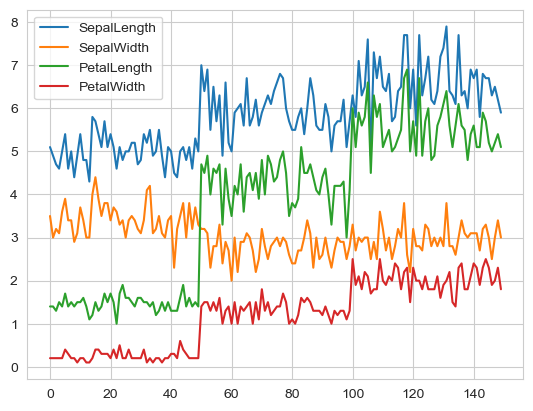

In [137]:
iris_df.plot()

We can also plot the data grouped by a column. In this case, the `Name` column.

Name
Iris-setosa        Axes(0.125,0.11;0.775x0.77)
Iris-versicolor    Axes(0.125,0.11;0.775x0.77)
Iris-virginica     Axes(0.125,0.11;0.775x0.77)
dtype: object

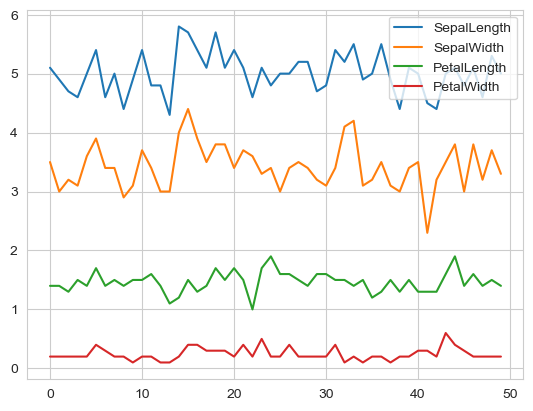

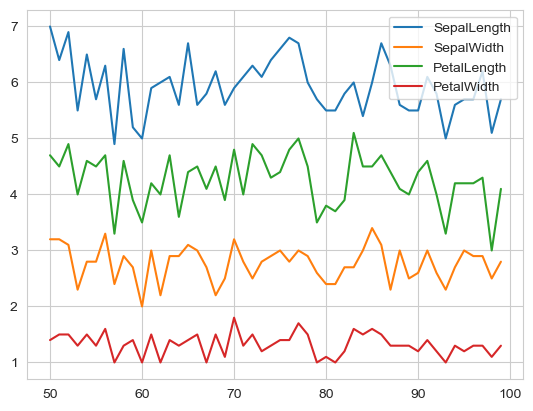

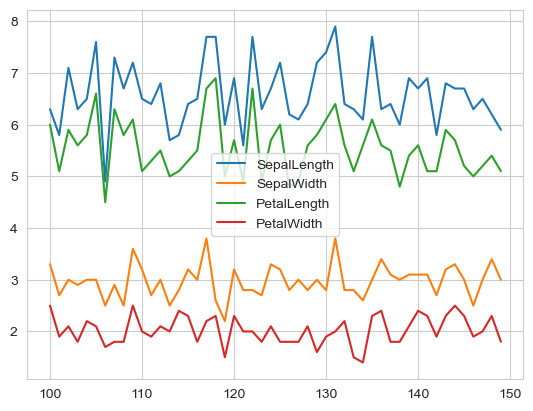

In [138]:
iris_df.groupby('Name').plot()

A scatter plot can be used to plot the data of two columns.

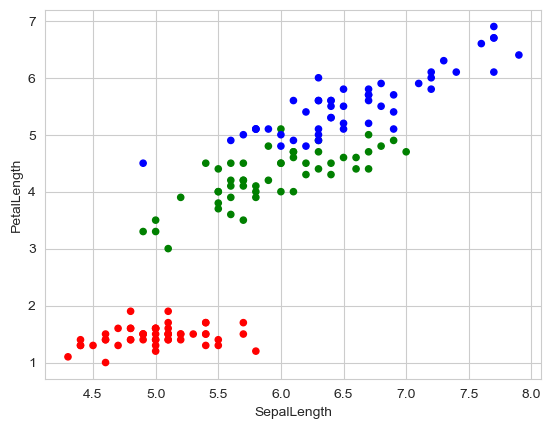

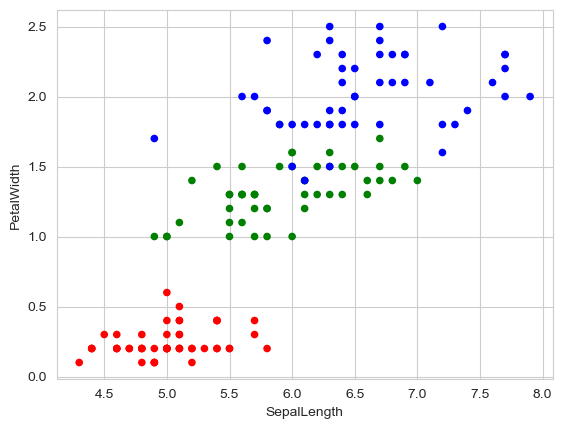

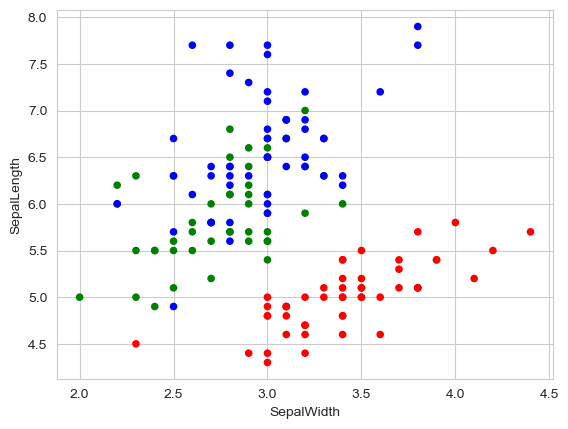

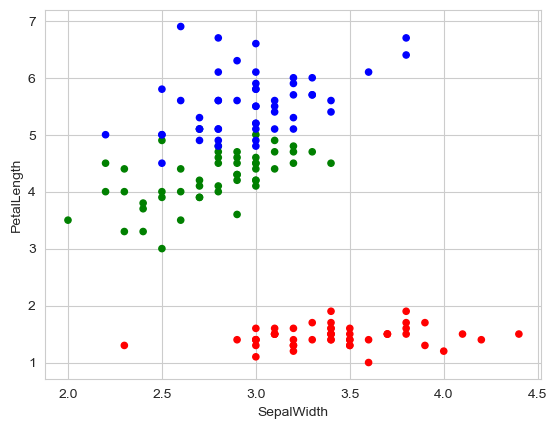

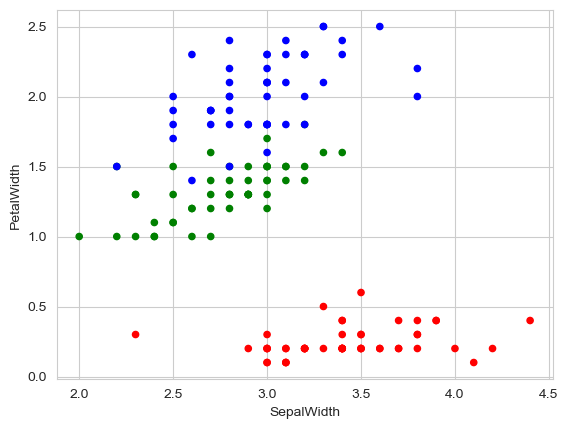

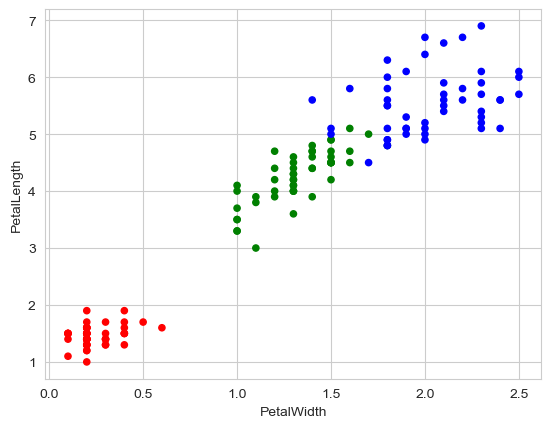

In [139]:
colors = dict(zip(iris_df.Name.unique(), ['red', 'green', 'blue']))

for t1 in ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']:
    for t2 in ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']:
        if t1 > t2:
            iris_df.plot(x=t1, y=t2, kind='scatter', c=iris_df.Name.apply(lambda x : colors[x]))


The use of subplots can be useful to plot the data of all columns in a single figure. In this case, we use the `subplots` method of the `matplotlib` library, and define a 4 by 4 grid of subplots.

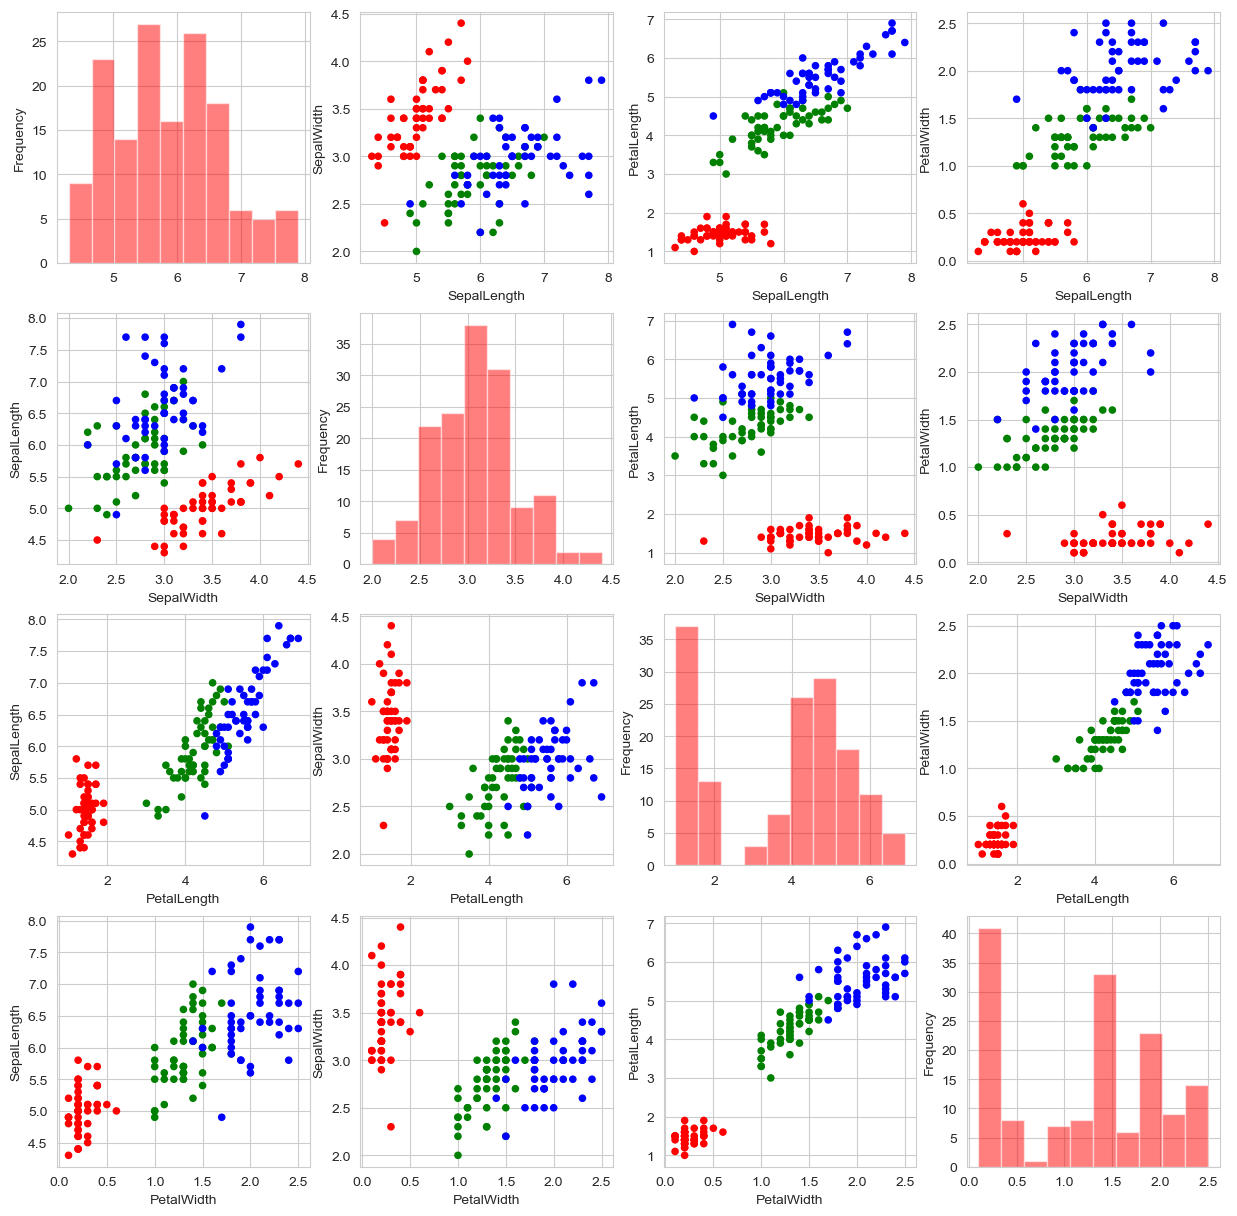

In [140]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize=(15, 15));

colors = dict(zip(iris_df.Name.unique(), ['red', 'green', 'blue']))
for i1, t1 in enumerate(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']):
    for i2, t2 in enumerate(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']):
        if t1 != t2:
            iris_df.plot(x=t1, y=t2, ax=axes[i1, i2], kind='scatter', c=iris_df.Name.apply(lambda x : colors[x]))
        else:
            iris_df[t1].plot(kind='hist', ax=axes[i1, i2], color='red', alpha=0.5)

A more automatic way to plot the data is using the `scatter_matrix` method of the `pandas.plotting` library.

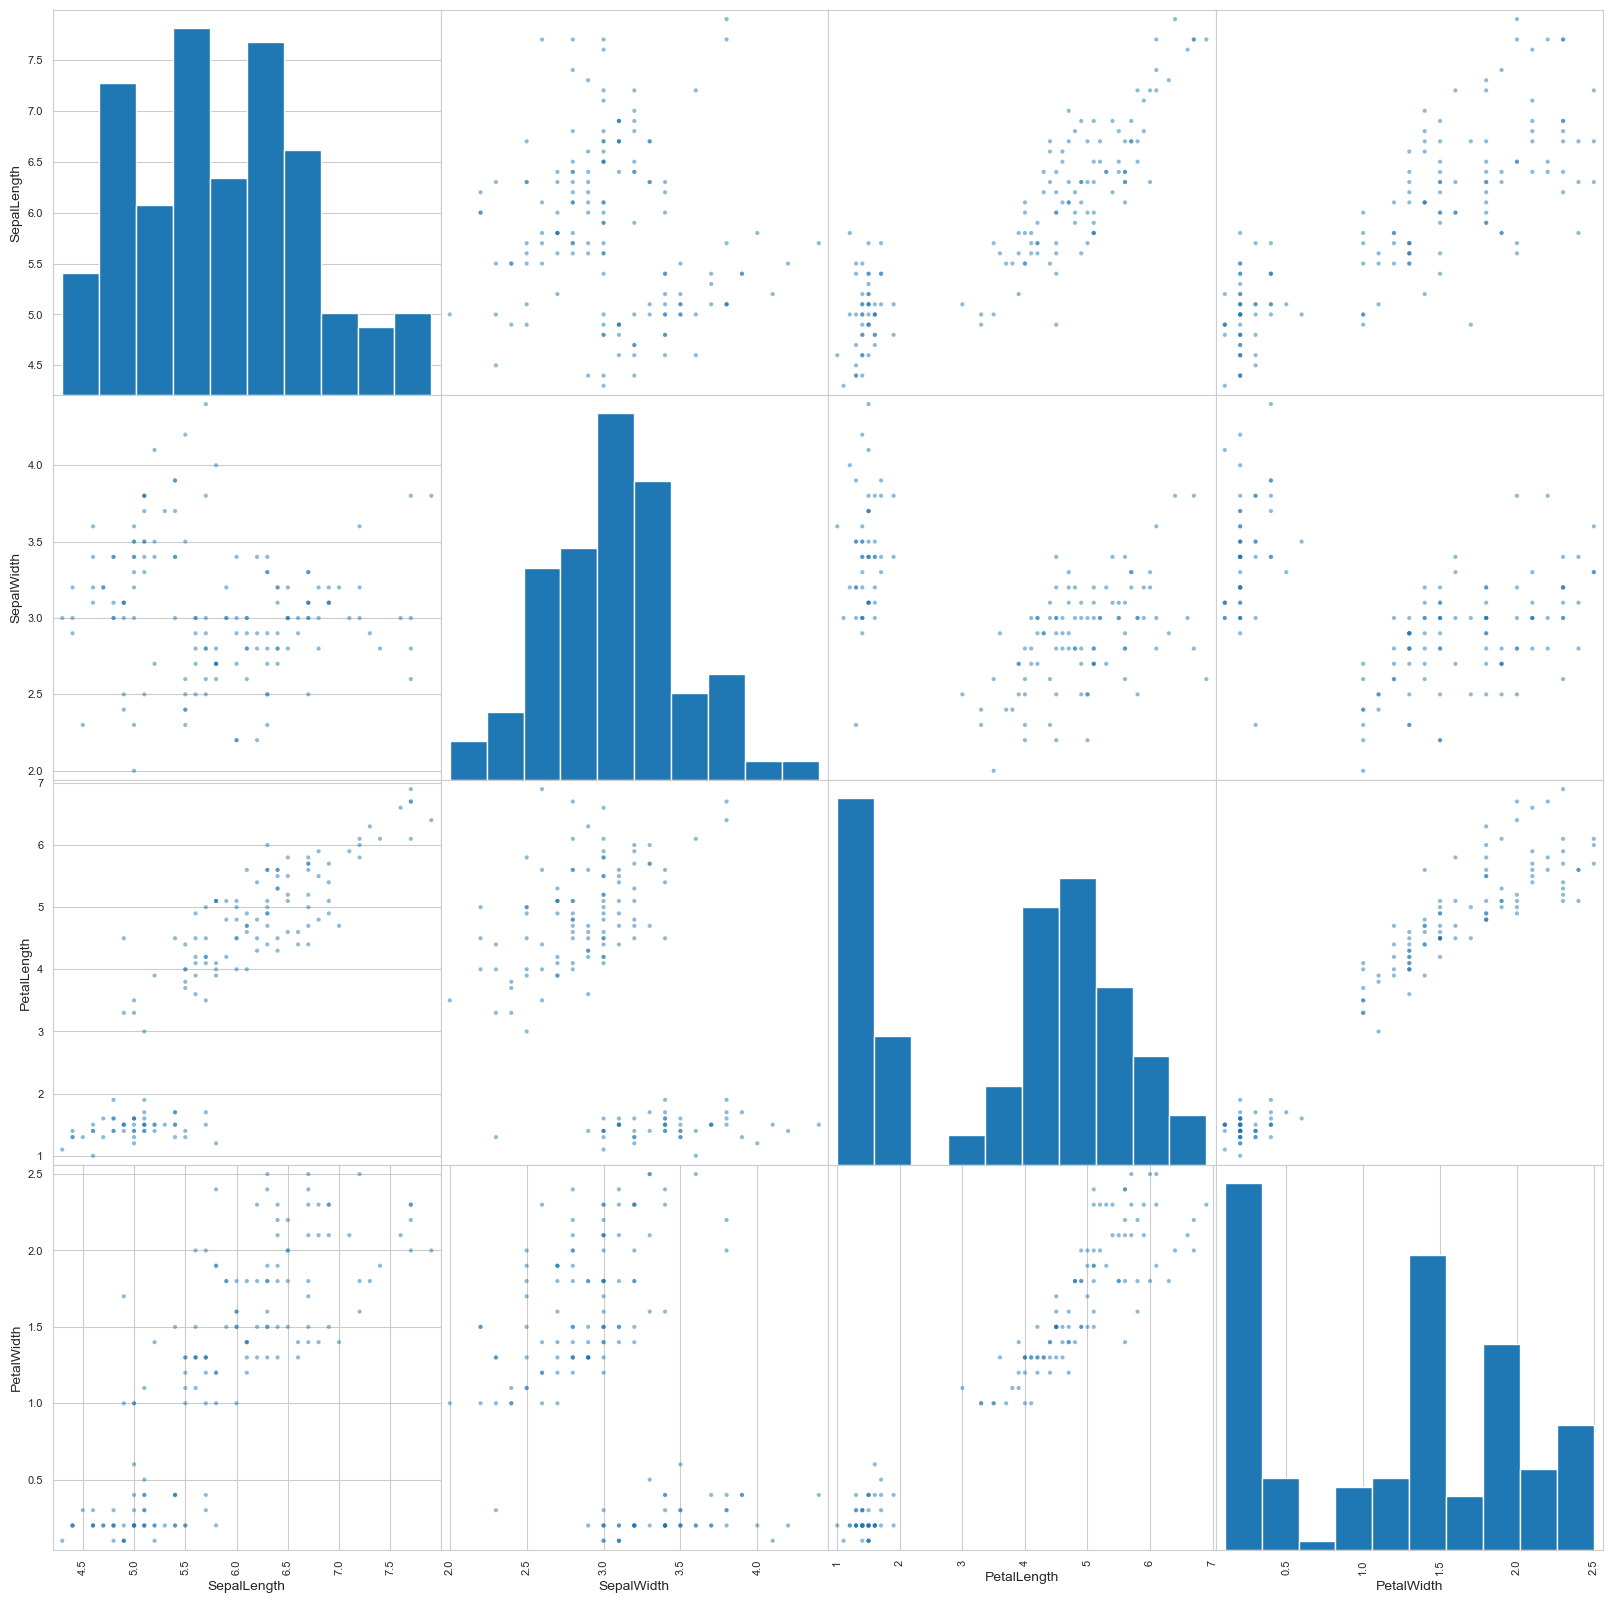

In [141]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(iris_df, figsize=(20, 20))

see more plotings at http://pandas.pydata.org/pandas-docs/version/0.18/visualization.html

## Running inplace
Some methods are allowed to be made inplace.  Let us remember the values of the `persons_df` dataframe

In [142]:
persons_df

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight
Mary,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight
Mary,70,F,Pt,cat,NaN,7,78.0,NaN,?
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight


E.g., the following sort of values will not affect the `persons_df` dataframe. In fact, it will return a new dataframe with the sorted values.

In [143]:
persons_df.sort_values(by=['age'])

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight
Ronald,23,M,Pt,turtle,190.0,8,NaN,NaN,NaN
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight
Christian,46,M,Pt,iguana,181.0,9,NaN,NaN,NaN


In [144]:
persons_df

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight
Mary,55,F,Pt,cat,160.0,5,64.0,25.000000,Normal weight
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight
Mary,70,F,Pt,cat,NaN,7,78.0,NaN,?
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight


So we can use the `inplace` argument (depends no the methods). In this case, the `persons_df` dataframe will be modified.

In [145]:
persons_df.sort_values(by=['age'], inplace=True)
persons_df

,age,gender,country,pet,height,classification,weight,BMI,category
name,,,,,,,,,
Helga,7,F,Pt,fish,150.0,7,20.0,8.888889,underweight
John,13,M,Pt,dog,172.0,3,58.0,19.605192,Normal weight
Margaret,16,F,Pt,cat,168.0,4,55.0,19.486961,Normal weight
Heidi,16,F,Pt,bird,151.0,6,25.0,10.964431,underweight
Ronald,23,M,Pt,turtle,190.0,8,NaN,NaN,NaN
George,34,M,Pt,iguana,172.0,8,79.0,26.703624,Overweight
Claudia,44,F,Pt,fish,178.0,2,75.0,23.671254,Normal weight
Peter,44,M,Pt,cat,185.0,1,90.0,26.296567,Overweight
Christian,46,M,Pt,iguana,181.0,9,NaN,NaN,NaN


# Exercise

The folder '3-data-analysis/data/names' contains files with the names registered in the US from  1880 to 2021. Use Pandas to

Join the data in the files in a single dataframe (e.g., a name by row)

In [ ]:
import pandas as pd

[pd.read]

Find the name most registered since 1880

The name less registered since 1880

Find the name most registered by year

Find the name most registered in the year 2000

Find the name less registered in the year 2000

Find the name most registered since 1880 by gender

Plot the evolution of the registration of the name `Mary'

Plot the evolution of the registration of the 10 most registered names

# Exercise

The folder '4-data-analysis/data/namesbystate' contains files with "State-specific data on the relative frequency of given names in the population of U.S. births where the individual has a Social Security Number"

Load the data into a single dataframe: what is the best structure?

Get the registration of females for NY

How many females where registered in NY since the begining of the records?

Get the registration of females named Olivia for NY

What was the minimum, maximum, average and 10th percentile of registrations of the name Olivia in NY?

Find how many times "Olivia" was registered in NY in 2000

Find the year and state where Olivia was most times registered in a single year.

Find the year where Olivia was most times registred (all states)

Find the states where the name Mary and John were most times registered

Plot the evolution of the names Mary and John through the years

Find the name most registered in a state for a single year

Plot the evolution of the top 5 (comulattive, i.e., all times) female names

Plot the comulative registration of the name Olivia in the states NY, NV, NM, Nj, and NH. 